<a href="https://colab.research.google.com/github/DCunoUCF/cap4630/blob/master/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2
Extend the notebook for solving linear regression using stochastic gradient 
descent to the case where there are two weights w1 and w2 and one bias term b.

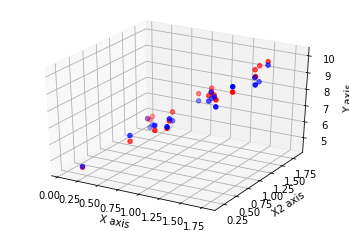

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

xs = 2 * np.random.rand(100, 1)
x2s = 2 * np.random.rand(100, 1)
ys = 4 + 3 * xs + np.random.rand(100, 1)

# split the data into training and test sets
# train set
# input x, x2, and function y
train_xs = xs[:80]   
train_x2s = x2s[:80]
train_ys = ys[:80]  

# test set
test_xs = xs[80:]   
test_x2s = x2s[80:] 
test_ys = ys[80:]  

# number of epochs
epochs = 10

# learning rate
lr = 0.01

# initial value for weight w, w2, and bias b
w = np.random.randn(1)  
w2 = np.random.randn(1)
b = np.zeros(1)        

for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w * train_xs[i] + w2 * train_x2s[i] + b
    
    grad_w = (y_pred - train_ys[i]) * train_xs[i]
    grad_w2 = (y_pred - train_ys[i]) * train_x2s[i]
    grad_b = (y_pred - train_ys[i])
    
    w -= lr * grad_w
    w2 -= lr * grad_w2
    b -= lr * grad_b
    
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w * test_xs[i] + w2 * test_x2s[i] + b - test_ys[i]) ** 2
test_loss /= 20

pred_ys = w * test_xs + w2 * test_x2s + b


fig = plt.figure()
ax = fig.gca(projection='3d')

# Data for a three-dimensional line
ax.scatter3D(test_xs, test_x2s, test_ys, c='b')
ax.scatter3D(test_xs, test_x2s, pred_ys, c='r') # predicted values

ax.set_xlabel('X axis')
ax.set_ylabel('X2 axis')
ax.set_zlabel('Y axis')

plt.show()